<a href="https://colab.research.google.com/github/prissyyy/Mini-Camp-IYKRA/blob/main/IYKRA_Exploratory-Data-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dtime
from decimal import Decimal

import matplotlib.pyplot as plt

#label Encoder
from sklearn.preprocessing import LabelEncoder, StandardScaler

Cara Import File dari G-Drive 

In [ ]:
# Harus Memasukkan authorization code/sandi Google Drive
from google.colab import drive
drive.mount('/content/drive') #masukkan code

In [ ]:
#read dataset
# df = pd.read_csv("dt_transaction.csv")
df = pd.read_csv("/content/drive/MyDrive/Minicamp day 2/transaction.csv")
df.head(2)

In [ ]:
df = pd.read_csv("")
df.head(2)

Import File Zip dari Github

In [ ]:
#Import Data from Zip file in Github
!wget --no-check-certificate \
    https://github.com/prissyyy/Mini-Camp-IYKRA/blob/main/transaction.zip?raw=true \
    -O /tmp/transaction.zip

--2021-11-08 12:27:07--  https://github.com/prissyyy/Mini-Camp-IYKRA/blob/main/transaction.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/prissyyy/Mini-Camp-IYKRA/raw/main/transaction.zip [following]
--2021-11-08 12:27:07--  https://github.com/prissyyy/Mini-Camp-IYKRA/raw/main/transaction.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/prissyyy/Mini-Camp-IYKRA/main/transaction.zip [following]
--2021-11-08 12:27:07--  https://raw.githubusercontent.com/prissyyy/Mini-Camp-IYKRA/main/transaction.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

In [ ]:
#Reading Data From github
df = pd.read_csv('/tmp/transaction.zip')
df.head(2)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,5.0,1.0,personal care,1/4/2024,3/8/2014,3/8/2014,492,492,9184,REVERSAL,False,820.15,True,False
1,733493772,733493772,5000,4191.39,2016-01-29T13:23:35,78.64,Lyft,US,US,5.0,1.0,rideshare,1/7/2025,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,808.61,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641905 entries, 0 to 641904
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641905 non-null  int64  
 1   customerId                641905 non-null  int64  
 2   creditLimit               641905 non-null  int64  
 3   availableMoney            641905 non-null  float64
 4   transactionDateTime       641905 non-null  object 
 5   transactionAmount         641905 non-null  float64
 6   merchantName              641905 non-null  object 
 7   acqCountry                637993 non-null  object 
 8   merchantCountryCode       641281 non-null  object 
 9   posEntryMode              638560 non-null  float64
 10  posConditionCode          641618 non-null  float64
 11  merchantCategoryCode      641905 non-null  object 
 12  currentExpDate            641905 non-null  object 
 13  accountOpenDate           641905 non-null  o

In [ ]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419050e+05,6.419050e+05,641905.000000,641905.000000,641905.000000,638560.000000,641618.000000,641905.000000,641905.000000,641905.000000,641905.000000
mean,5.547676e+08,5.547676e+08,10697.290487,6652.857745,135.163114,9.136521,3.238399,557.200841,556.776068,4886.123785,4044.432742
std,2.546894e+08,2.546894e+08,11460.419619,9227.193611,147.053781,16.961295,9.680927,257.327892,257.404330,2859.028430,5945.536388
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.960000,32.320000,2.000000,1.000000,334.000000,333.000000,2364.000000,502.450000
50%,5.438879e+08,5.438879e+08,7500.000000,3578.100000,85.800000,5.000000,1.000000,581.000000,580.000000,4873.000000,2151.890000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.440000,189.030000,9.000000,1.000000,762.000000,761.000000,7267.000000,5005.970000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


In [ ]:
#1 customerId for 1 account, so we can drop one of these variables
print(df["customerId"].nunique())
print(df["accountNumber"].nunique())

5000
5000


In [ ]:
#drop unnecessary columns
df.drop(['customerId','merchantName'],axis=1, inplace=True)

In [ ]:
df.shape

(641905, 21)

## Data Transformation

In [ ]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'], format="%Y-%m-%dT%H:%M:%S")
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], format="%d/%m/%Y")
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], format="%d/%m/%Y")
df['transactionTime'] = [i.time() for i in df['transactionDateTime']]
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'], format="%d/%m/%Y")

max_trans = df["transactionDateTime"].max()
df["card_age"] = [(max_trans - age).total_seconds()/86400 for age in df["accountOpenDate"]]
df["card_recency"] = [(max_trans - r).total_seconds()/86400 for r in df["transactionDateTime"]]
df["card_before_exp"] = [(max_trans - r).total_seconds()/86400 for r in df["currentExpDate"]]
df["card_last_change"] = [(max_trans - r).total_seconds()/86400 for r in df["dateOfLastAddressChange"]]

df.drop(['dateOfLastAddressChange','accountOpenDate','currentExpDate','transactionDateTime'],axis=1, inplace=True)

In [ ]:
#fraud, expire, cp is temporary file before replacing the real value
fraud = [0 if x == False else 1 for x in df['isFraud']]
expire = [0 if e == False else 1 for e in df['expirationDateKeyInMatch']]
cp = [0 if c == False else 1 for c in df['cardPresent']]

df['isFraud'] = fraud
df['expirationDateKeyInMatch'] = expire
df['cardPresent'] = cp

In [ ]:
df['No'] = range(1,df.shape[0]+1)

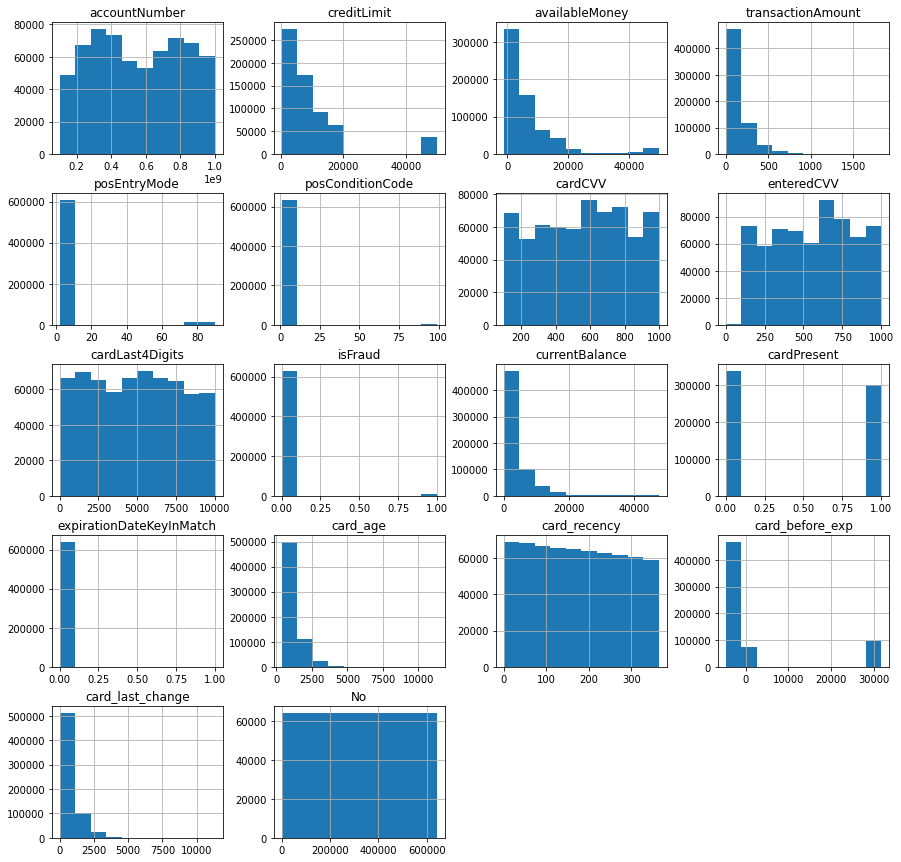

In [ ]:
#variable distribution before imputation
df.hist(figsize=(15,15))
plt.show()

## Missing Value Handling

In [ ]:
null_cols = df.loc[:,df.isna().sum()>0]
null_cols

,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,transactionType
0,US,US,5.0,1.0,REVERSAL
1,US,US,5.0,1.0,PURCHASE
2,US,US,5.0,1.0,PURCHASE
3,US,US,90.0,1.0,PURCHASE
4,US,US,2.0,1.0,PURCHASE
...,...,...,...,...,...
641900,US,US,5.0,8.0,PURCHASE
641901,US,US,9.0,1.0,PURCHASE
641902,US,US,2.0,1.0,PURCHASE
641903,US,US,9.0,8.0,PURCHASE


In [ ]:
null_cols.isna().sum().sort_values(ascending=False)*100/df.shape[0]

acqCountry             0.609436
posEntryMode           0.521105
merchantCountryCode    0.097211
transactionType        0.091758
posConditionCode       0.044711
dtype: float64

In [ ]:
df['acqCountry'].fillna(df['acqCountry'].mode()[0], axis=0, inplace=True)
df['posEntryMode'].fillna(df['posEntryMode'].median(), axis=0, inplace=True)
df['merchantCountryCode'].fillna(df['merchantCountryCode'].mode()[0], axis=0, inplace=True)
df['transactionType'].fillna(df['transactionType'].mode()[0], axis=0, inplace=True)
df['posConditionCode'].fillna(df['posConditionCode'].median(), axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641905 entries, 0 to 641904
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641905 non-null  int64  
 1   creditLimit               641905 non-null  int64  
 2   availableMoney            641905 non-null  float64
 3   transactionAmount         641905 non-null  float64
 4   acqCountry                641905 non-null  object 
 5   merchantCountryCode       641905 non-null  object 
 6   posEntryMode              641905 non-null  float64
 7   posConditionCode          641905 non-null  float64
 8   merchantCategoryCode      641905 non-null  object 
 9   cardCVV                   641905 non-null  int64  
 10  enteredCVV                641905 non-null  int64  
 11  cardLast4Digits           641905 non-null  int64  
 12  transactionType           641905 non-null  object 
 13  isFraud                   641905 non-null  i

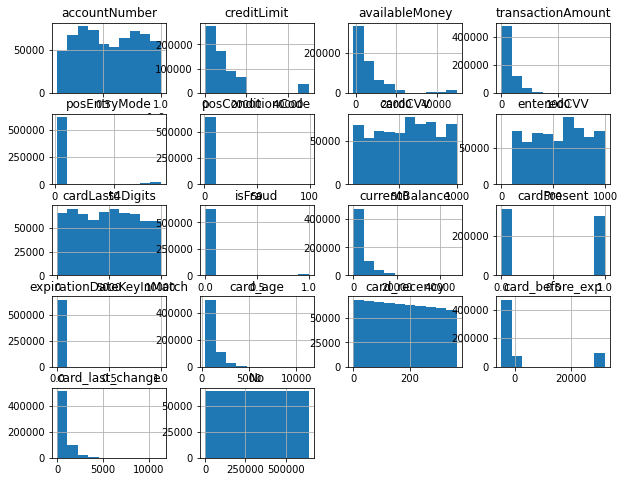

In [ ]:
#variable distribution AFTER imputation
df.hist(figsize=(10,8))
plt.show()

## Exploration

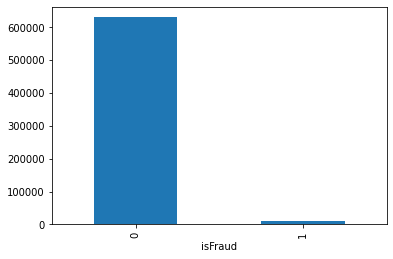

In [ ]:
#Ratio Fraud & non fraud
df.groupby('isFraud').count()['accountNumber'].plot(kind='bar')

**How is the credit limit, availableMoney, transaction amount, current balance between these categories? (fraud and non fraud)** (Bagaimana batas kredit, Uang yang tersedia, jumlah transaksi, saldo saat ini seimbang antara kategori ini? (penipuan dan non-penipuan)

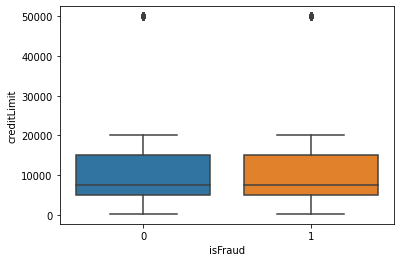

In [ ]:
# 1) Credit Limit 
ax = sns.boxplot(x="isFraud", y="creditLimit", data=df)

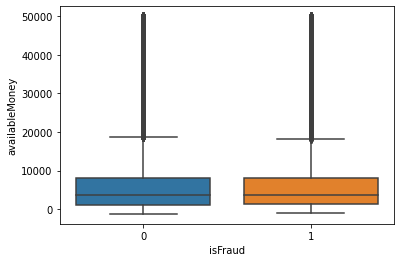

In [ ]:
# 2) Available Money
ax = sns.boxplot(x="isFraud", y="availableMoney", data=df)

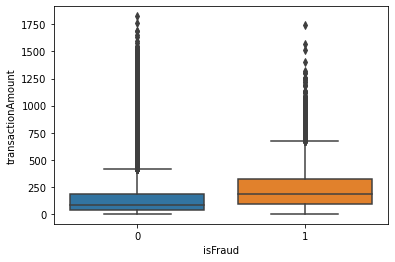

In [ ]:
# 3) Transaction Amount
ax = sns.boxplot(x="isFraud", y="transactionAmount", data=df)

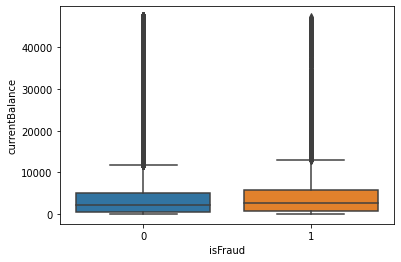

In [ ]:
#4)Current Balance
ax = sns.boxplot(x="isFraud", y="currentBalance", data=df)

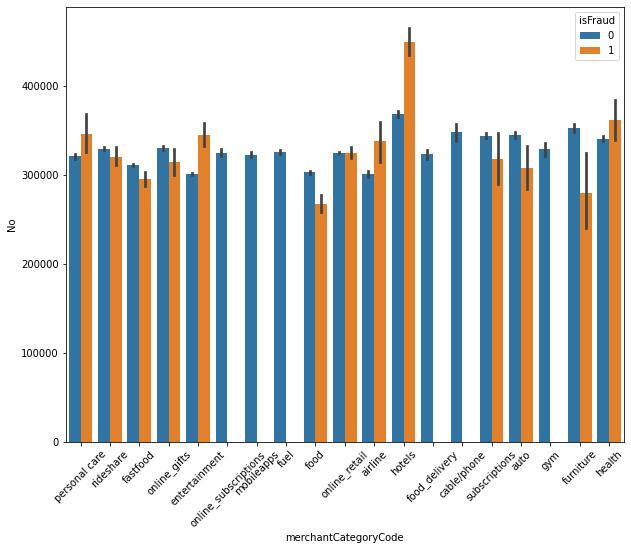

In [ ]:
#Merchant Category fraudelent the most

plt.figure(figsize=(10,8))
sns.barplot(x='merchantCategoryCode', y = 'No', hue='isFraud', data = df)
plt.xticks(rotation=45)
plt.show()

 **Is there any difference behaviour of account which has fraudulent transaction? Is there anomaly from type of usual transaction, amount, card Present?** (Apakah ada perbedaan perilaku akun yang melakukan transaksi penipuan? Apakah ada anomali dari jenis transaksi biasa, jumlah, kartu Hadir?)

In [ ]:
#take 10 accountNumber with fraud transaction as sample
df[df['isFraud']==1]['accountNumber'].unique()[:10]

array([733493772, 965952336, 770957922, 223895414, 814139734, 885773130,
       784469543, 331448375, 782400169, 121292224])

In [ ]:
df.loc[(df['accountNumber']==733493772)&(df['isFraud']==1)]['transactionType'].unique()

array(['PURCHASE', 'REVERSAL'], dtype=object)

In [ ]:
df.loc[(df['accountNumber']==733493772)&(df['isFraud']==0)]['transactionType'].unique()

array(['REVERSAL', 'PURCHASE', 'ADDRESS_VERIFICATION'], dtype=object)

In [ ]:
df.loc[(df['accountNumber']==733493772)&(df['isFraud']==1)]['merchantCategoryCode'].unique()

array(['rideshare'], dtype=object)

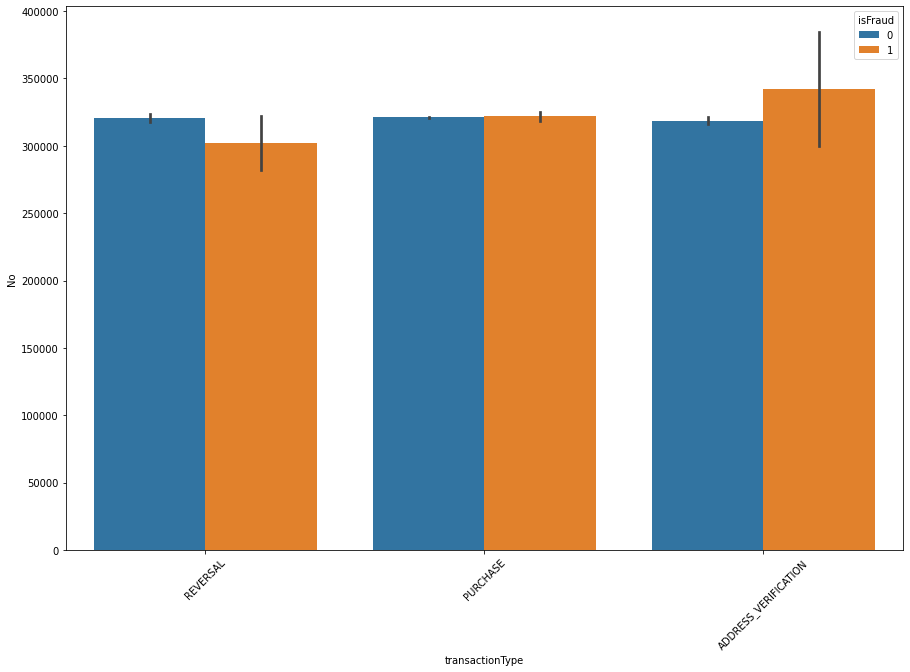

In [ ]:
#Transaction type
plt.figure(figsize=(15,10))
sns.barplot(x='transactionType', y = 'No', hue='isFraud', data = df)
plt.xticks(rotation=45)
plt.show()

## Category Encoding

In [ ]:
lbl = LabelEncoder()
x = lbl.fit_transform(df['acqCountry'])

In [ ]:
df_obj = df.select_dtypes('object').columns
for obj in df_obj:
    df[obj] = lbl.fit_transform(df[obj])

In [ ]:
df.loc[df['isFraud']==0].shape[0]/df.shape[0]

0.9823961489628528

## Matrix Correlation

In [ ]:
corr = df.corr()

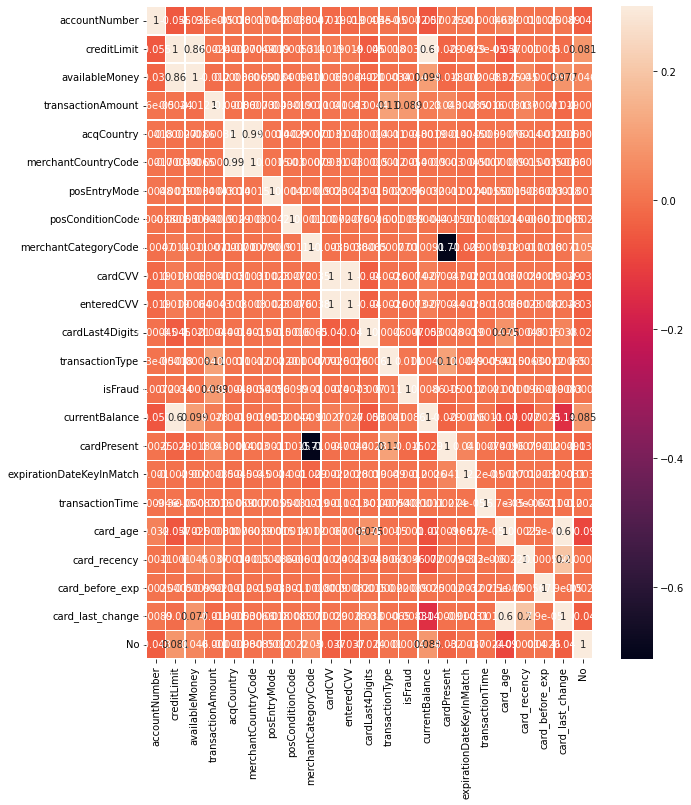

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(corr, vmax=.3, linewidth=.5, annot=True)

## Under Sampling

In [ ]:
df_sampling = df.sample(frac=1, random_state=44)

In [ ]:
df.loc[df['isFraud']==1].shape

(11300, 23)

In [ ]:
df_fraud = df_sampling.loc[df["isFraud"]==1]
df_nonfraud = df_sampling.loc[df["isFraud"]==0].sample(n=11302, random_state=44)

In [ ]:
df_sampling = pd.concat([df_fraud,df_nonfraud])

In [ ]:
df_sampling.shape

(22602, 23)

In [ ]:
df_sampling.corr()['isFraud'].abs().sort_values(ascending=False)

isFraud                     1.000000
transactionAmount           0.281806
cardPresent                 0.061269
transactionType             0.050192
merchantCategoryCode        0.039540
cardCVV                     0.037151
enteredCVV                  0.036120
card_recency                0.034480
posConditionCode            0.031631
currentBalance              0.029393
card_last_change            0.028912
accountNumber               0.027646
cardLast4Digits             0.025732
posEntryMode                0.018440
merchantCountryCode         0.017823
acqCountry                  0.015739
creditLimit                 0.014400
transactionTime             0.006907
expirationDateKeyInMatch    0.004858
card_before_exp             0.003012
card_age                    0.001845
availableMoney              0.001779
No                          0.001351
Name: isFraud, dtype: float64

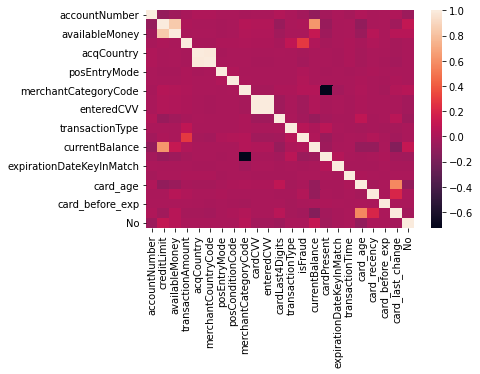

In [ ]:
sns.heatmap(df_sampling.corr())

## OVER SAMPLING (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sm = SMOTE()

In [ ]:
df.dtypes

accountNumber                 int64
creditLimit                   int64
availableMoney              float64
transactionAmount           float64
acqCountry                    int64
merchantCountryCode           int64
posEntryMode                float64
posConditionCode            float64
merchantCategoryCode          int64
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType               int64
isFraud                       int64
currentBalance              float64
cardPresent                   int64
expirationDateKeyInMatch      int64
transactionTime               int64
card_age                    float64
card_recency                float64
card_before_exp             float64
card_last_change            float64
No                            int64
dtype: object

In [57]:
X_train, y_train = sm.fit_sample(df.drop('isFraud',axis=1), df['isFraud'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [55]:
oversample_df = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)])
#oversample_df.columns = df2.columns #df2 is not define

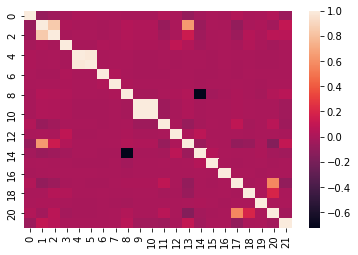

In [50]:
sns.heatmap(oversample_df.corr())

In [ ]:
#oversample_df.corr()['isFraud'].abs().sort_values(ascending=False) #Key error isFraud

REFERENSI

[Link Google Colab](https://colab.research.google.com/drive/10nuJA5_W9OocCvmcVX-XFZ9v8-QrUYfk?usp=sharing)